In [2]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 어떤 데이터셋이 사라집니다 같은 문구 뺴고 오류만 출력시키는거 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from mpl_toolkits.mplot3d import Axes3D, axes3d

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

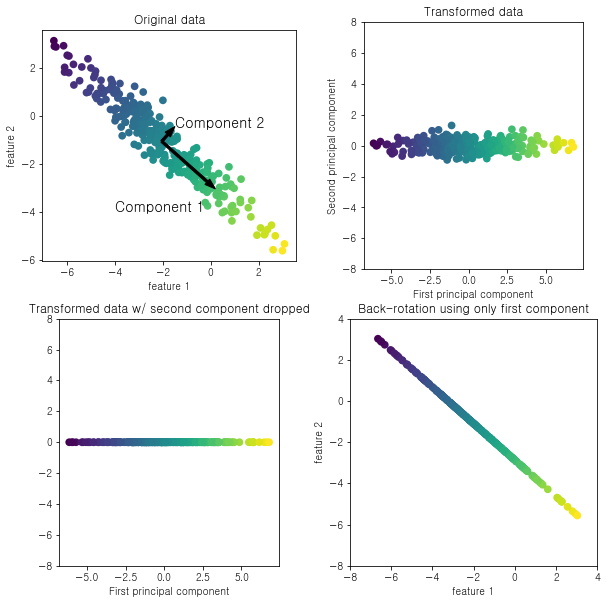

In [3]:
mglearn.plots.plot_pca_illustration()

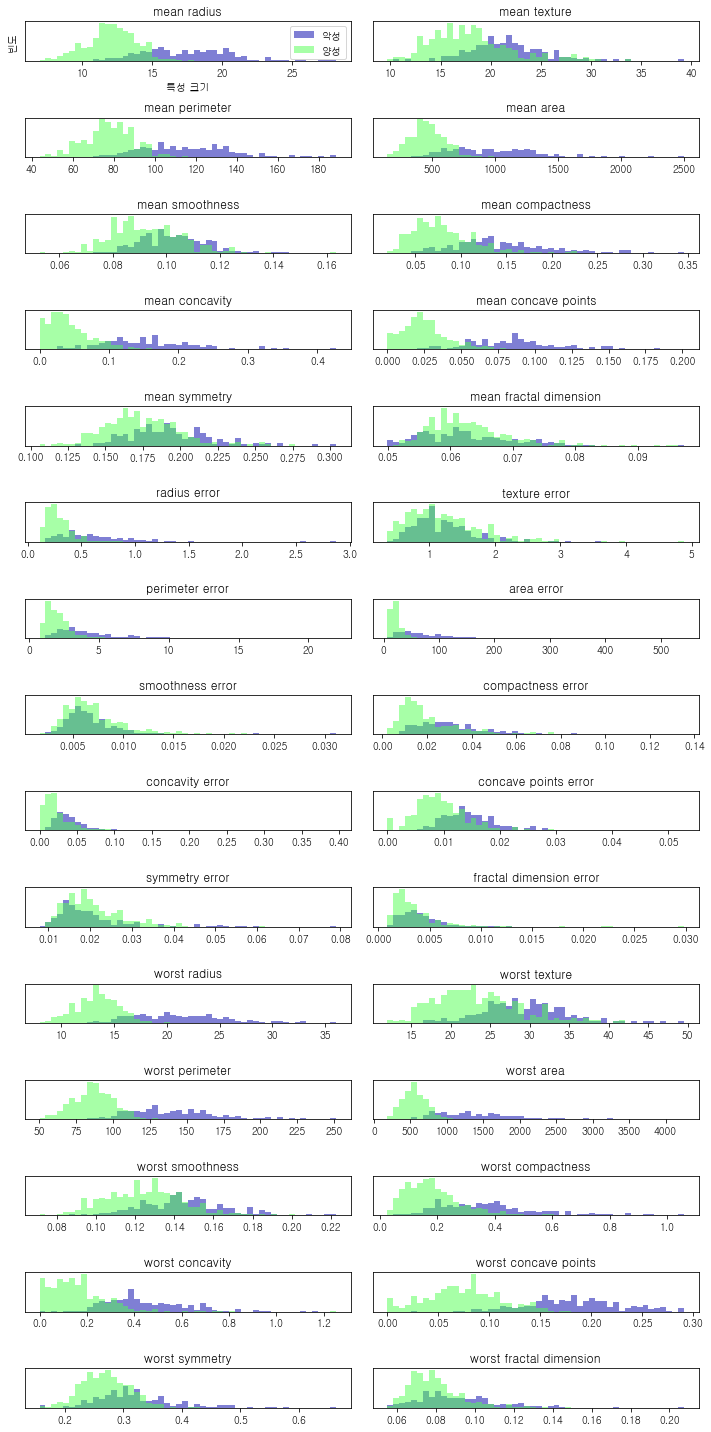

In [4]:
cancer = load_breast_cancer()
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성","양성"],loc="best")
fig.tight_layout()




In [5]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))


원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

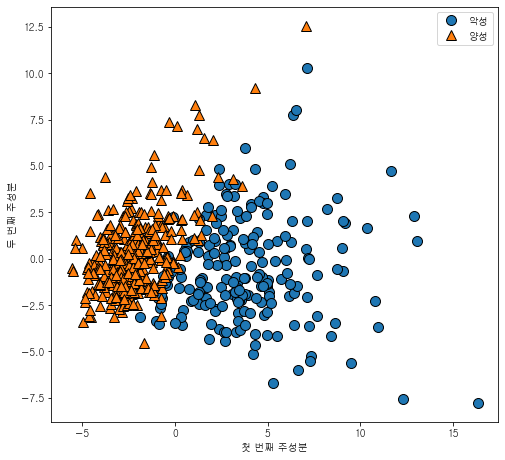

In [7]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(["악성","양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")


In [8]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [9]:
print("PCA 주성분 형태:", pca.components_)


PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

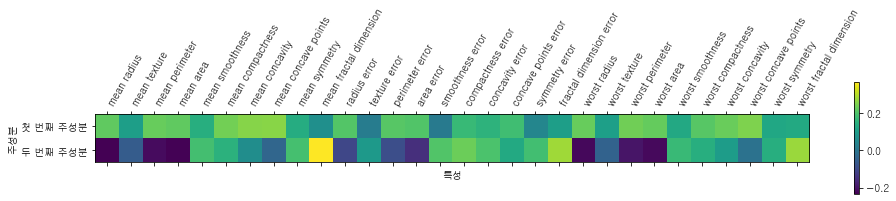

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

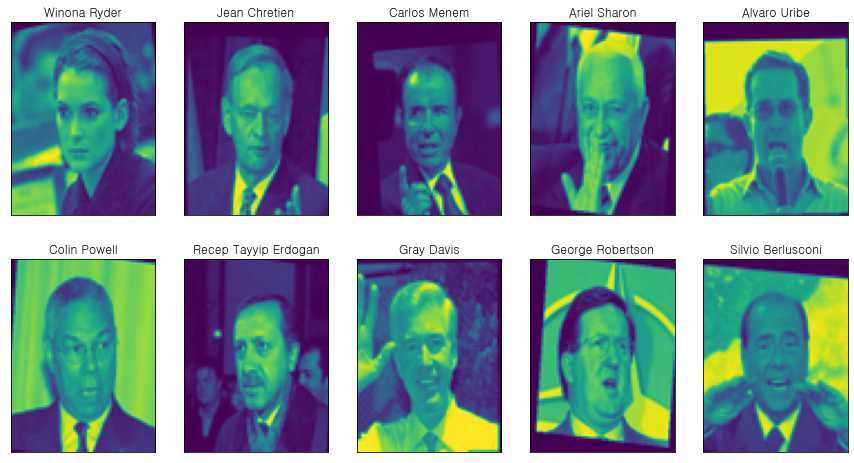

In [3]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))


people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [5]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='') # end="" 개행 안되게 붙이기
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo          39Alvaro Uribe              35Amelie Mauresmo           21
Andre Agassi              36Angelina Jolie            20Ariel Sharon              77
Arnold Schwarzenegger     42Atal Bihari Vajpayee      24Bill Clinton              29
Carlos Menem              21Colin Powell             236David Beckham             31
Donald Rumsfeld          121George Robertson          22George W Bush            530
Gerhard Schroeder        109Gloria Macapagal Arroyo   44Gray Davis                26
Guillermo Coria           30Hamid Karzai              22Hans Blix                 39
Hugo Chavez               71Igor Ivanov               20Jack Straw                28
Jacques Chirac            52Jean Chretien             55Jennifer Aniston          21
Jennifer Capriati         42Jennifer Lopez            21Jeremy Greenstock         24
Jiang Zemin               20John Ashcroft             53John Negroponte           31
Jose Maria Aznar          23Juan Carlos Ferrero       28Junichiro

In [6]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

# scikit-learn == 0.20 이상은 아래부터 코드 오류

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0,test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.14


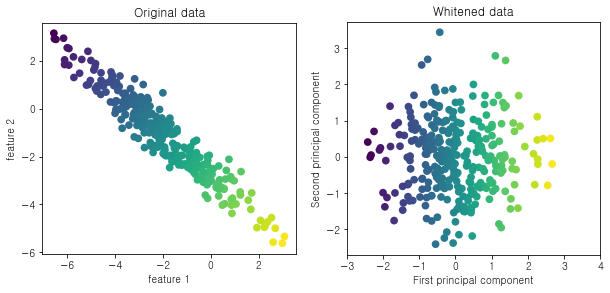

In [16]:
mglearn.plots.plot_pca_whitening()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape", X_train_pca.shape)

X_train_pca.shape (1547, 100)


In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.15


In [11]:
print("pca.components_.shape:",pca.components_.shape)

pca.components_.shape: (100, 5655)


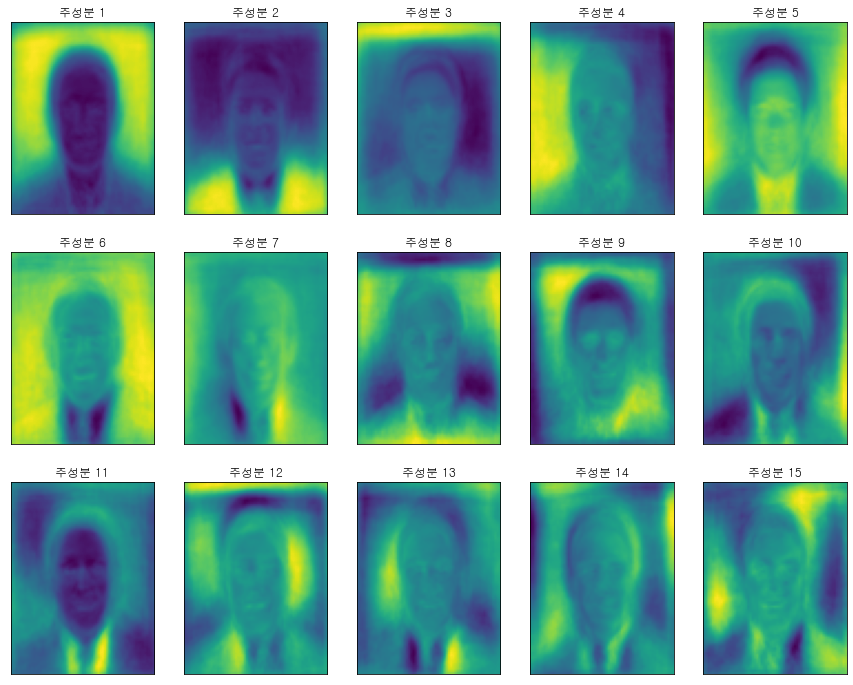

In [13]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))


________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[3.183391e-03, ..., 8.201974e-05],
       ...,
       [1.845444e-04, ..., 0.000000e+00]], dtype=float32), 
array([[0.000000e+00, ..., 0.000000e+00],
       ...,
       [1.537870e-05, ..., 3.014225e-03]], dtype=float32))
________________________________________________________pca_faces - 7.7s, 0.1min


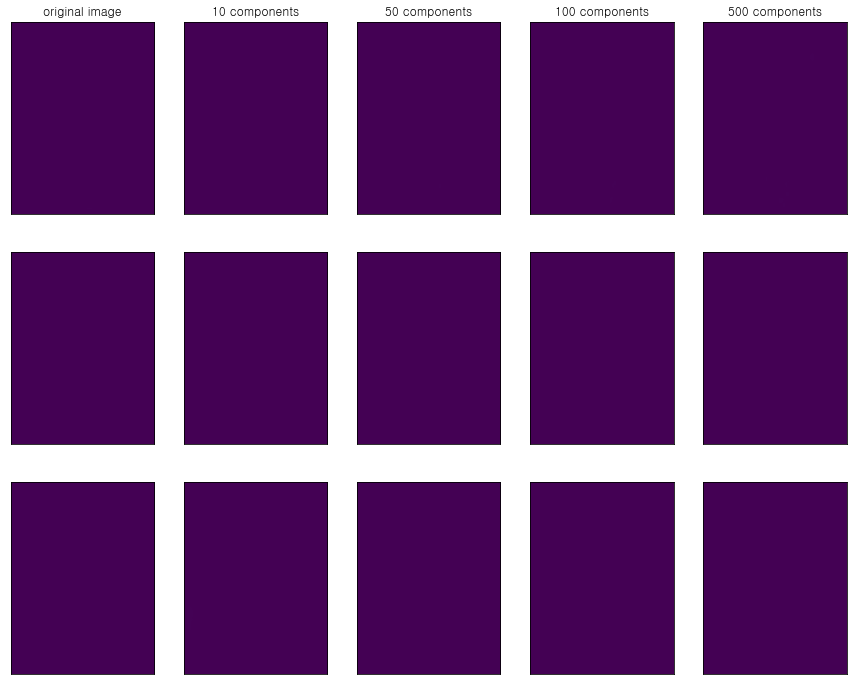

In [14]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

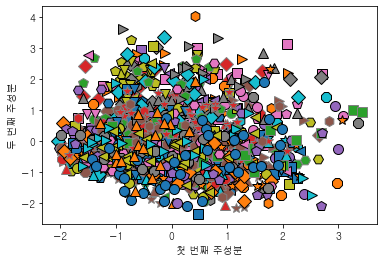

In [15]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")


# 비음수 행렬 분해(NMF)

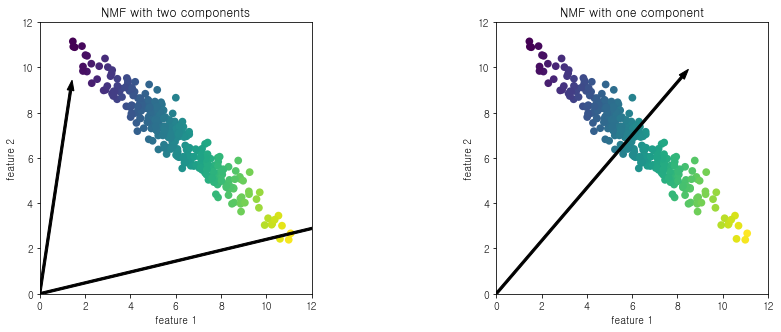

In [2]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[3.183391e-03, ..., 8.201974e-05],
       ...,
       [1.845444e-04, ..., 0.000000e+00]], dtype=float32), 
array([[0.      , ..., 0.      ],
       ...,
       [0.003224, ..., 0.003122]], dtype=float32))
______________________________________________________nmf_faces - 494.8s, 8.2min


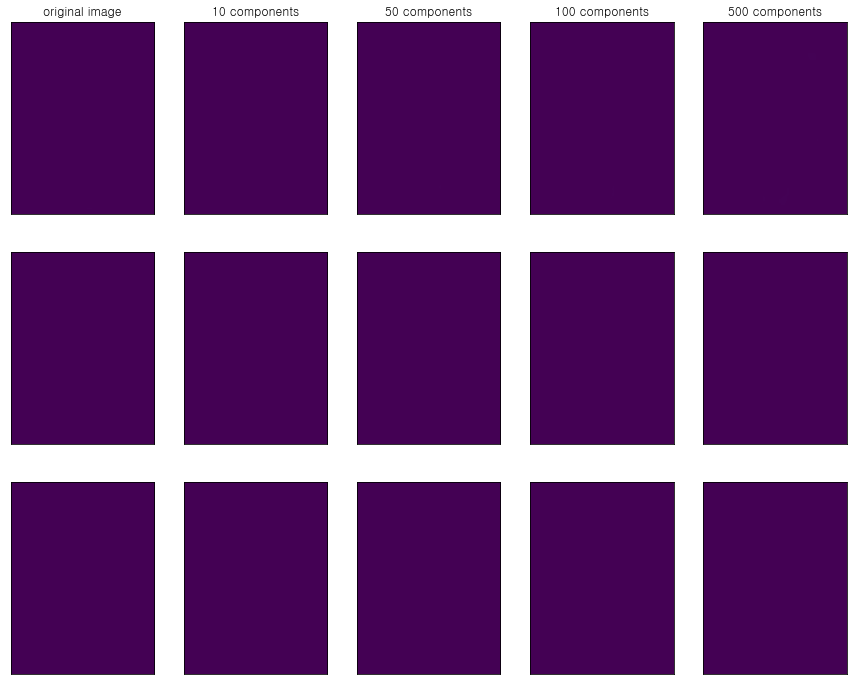

In [16]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

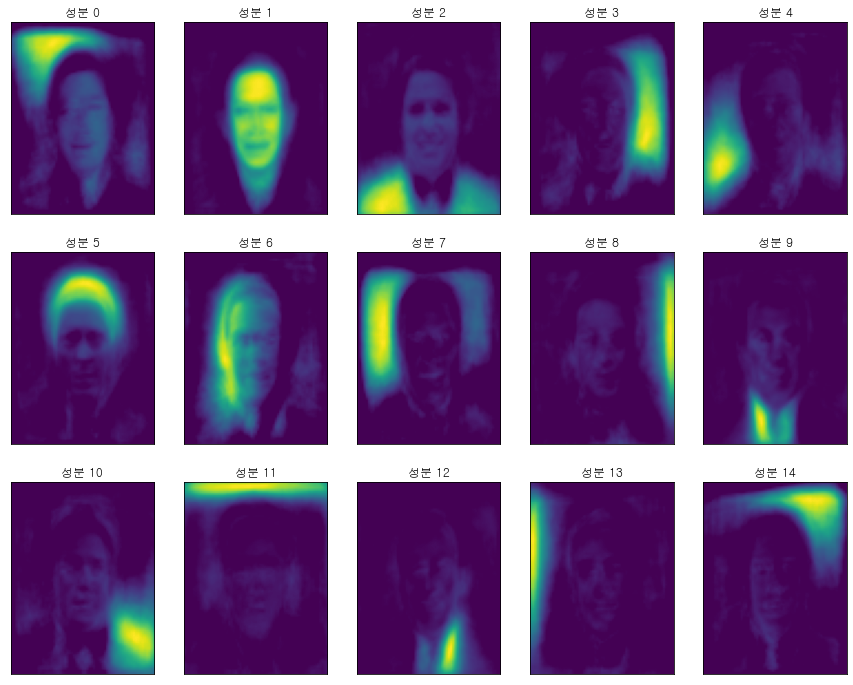

In [17]:
from sklearn.decomposition import NMF 
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

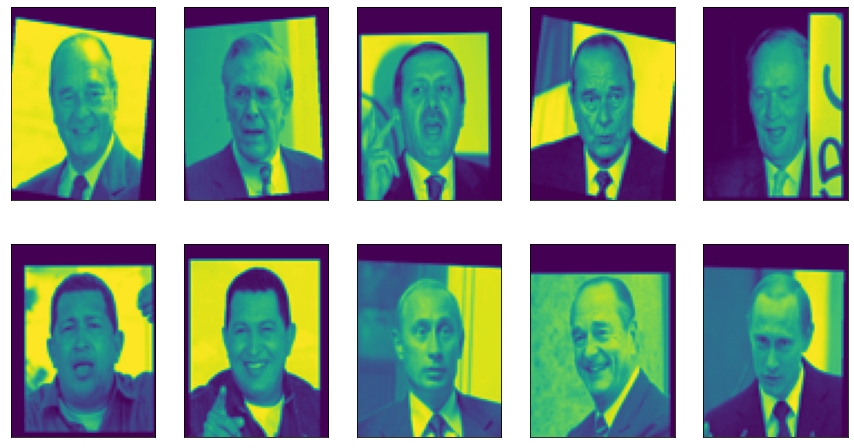

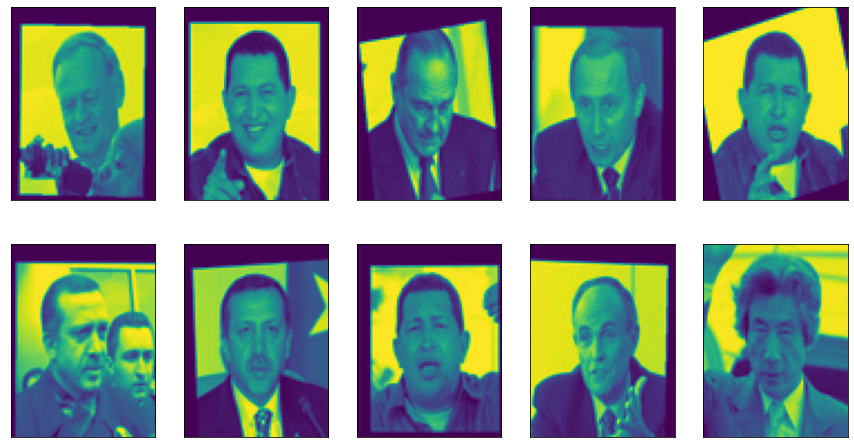

In [18]:
compn = 3
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7

inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

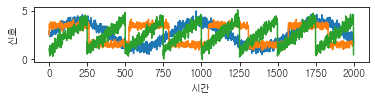

In [5]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("시간")
plt.ylabel("신호")


In [6]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태:",X.shape)

측정 데이터 형태: (2000, 100)


In [9]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [11]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
H = pca.fit_transform(X)

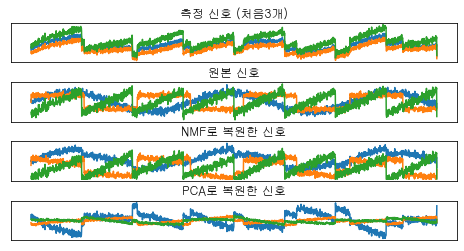

In [12]:
models = [X, S, S_, H]
names = ['측정 신호 (처음3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(),'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

# t-SNE 를 이용한 매니폴드 학습

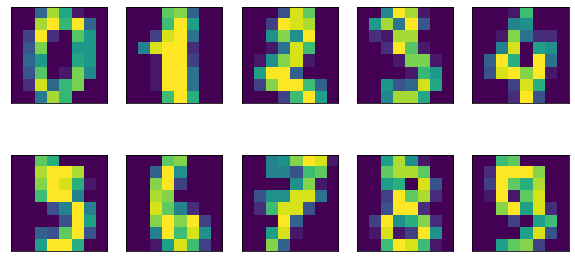

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5), subplot_kw={'xticks':(),'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

    

Text(0, 0.5, '두 번째 주성분')

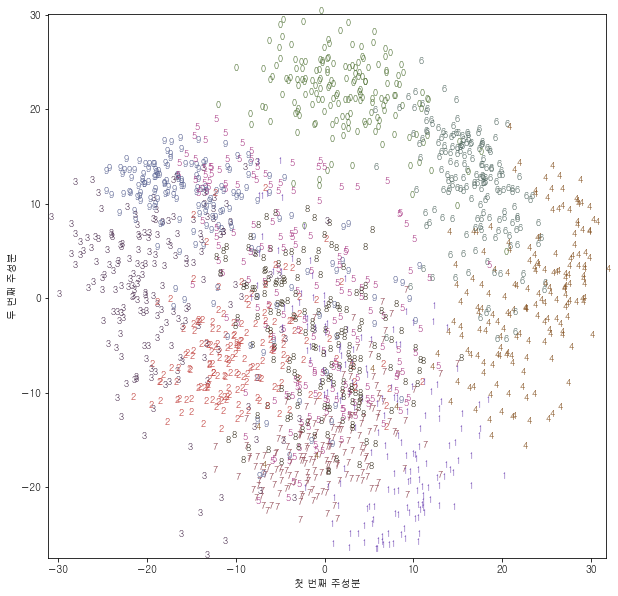

In [15]:
pca =PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight':'bold','size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")



Text(0, 0.5, 't-SNE 특성 1')

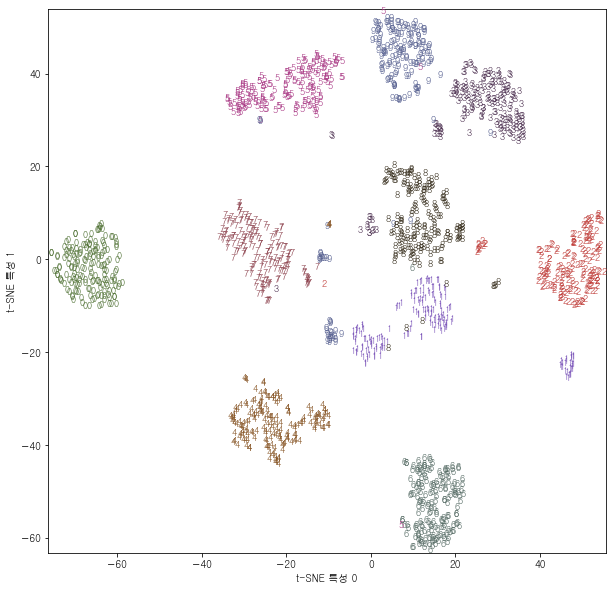

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

